# read image, display it

In [1]:
import cv2
img = cv2.imread('images/Robin.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image', img) 
cv2.imshow('Gray image', gray)
cv2.waitKey(0)        
cv2.destroyAllWindows() 



# read, convert to grayscale, save

In [2]:
import cv2
img = cv2.imread('images/Anna.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('images/AnnaGray.jpg', gray)

True

# Image is just a function
## Read grayscale, and plot this function

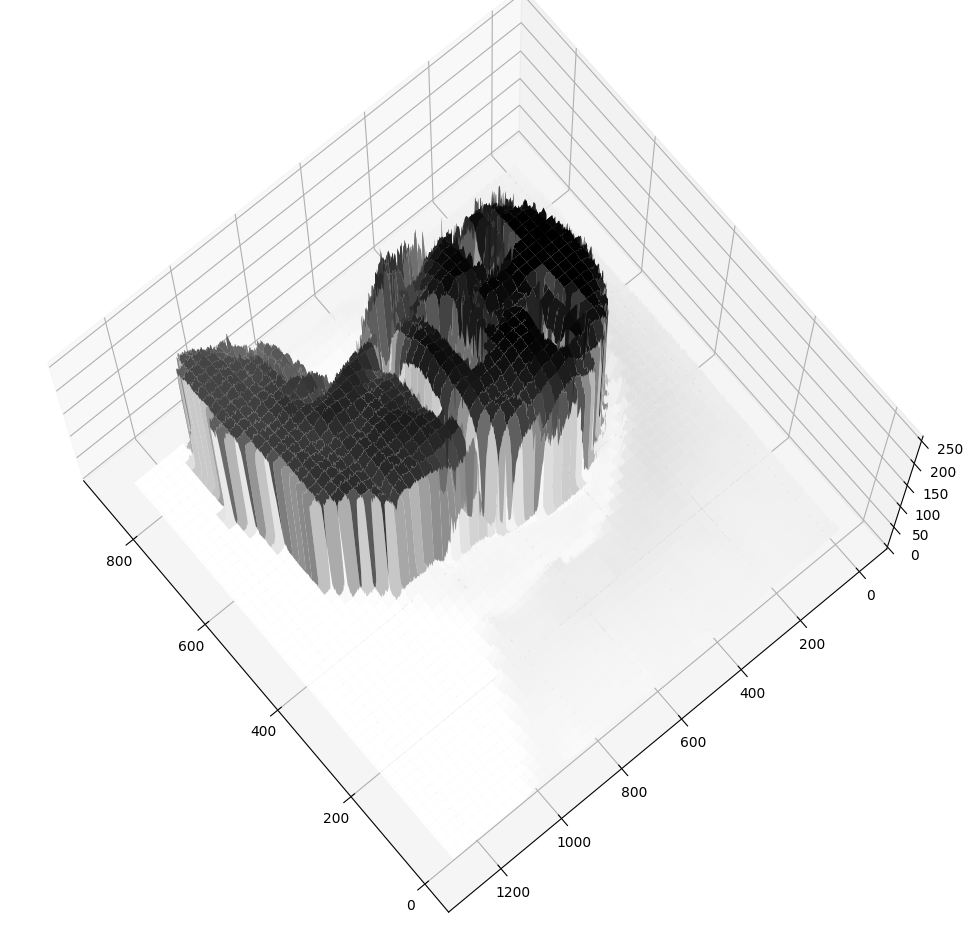

In [67]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

img = cv2.imread('images/AnnaGray.jpg', cv2.IMREAD_GRAYSCALE)
x=np.arange(0, img.shape[1])
y=np.arange(0, img.shape[0])
xx, yy = np.meshgrid(x, y)

# Set up Figure and 3D Axes
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Plot using Axes notation
ax.view_init(75, 140)
ax.plot_surface(xx, yy, img, cmap=cm.Greys)

# Convolution & Correlations
## Animation how correlation works

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interactive, IntSlider, Layout, Button
%matplotlib inline
def g(i):
    plt.figure(figsize = (8,8))
    plt.imshow(mpimg.imread('animations\\correlation\\corr'+f'{i:04d}'+'.png'))
    # plt.axis('off')
    plt.show()

interactive_plot = interactive(g, i=IntSlider(    value=1,    min=1,    max=254,    step=1,   layout=Layout(width='1400px') ))
interactive_plot

interactive(children=(IntSlider(value=1, description='i', layout=Layout(width='1400px'), max=254, min=1), Outp…

## Same as on the animation, but with python

In [201]:
from scipy import signal
import numpy as np

H = np.array([[1,2],[3,0]])
F=np.array([[2,2,3],[0,1,3],[1,2,0]])

print("H \n",H )
print("F \n",F)
correlation= signal.correlate2d(F, H, mode='valid') # in this function we bass image first then filter
print("correlation(H, F)\n",correlation)

H 
 [[1 2]
 [3 0]]
F 
 [[2 2 3]
 [0 1 3]
 [1 2 0]]
correlation(H, F)
 [[ 6 11]
 [ 5 13]]



## Correlate impulse with simple image

In [96]:
from scipy import signal
import numpy as np

impulse = np.zeros([5,5])
impulse[2,2]=1
print("impulse\n", impulse)

img = np.arange(1,10).reshape((3, 3))
print("img\n",img)

correlation= signal.correlate2d(impulse, img)
print("correlation(impulse, img)\n",correlation)

correlation= signal.correlate2d(img, impulse)
print("correlation(img, impulse)\n",correlation)

convolve2d= signal.convolve2d(impulse, img)
print("convolve2d(impulse, img)\n",convolve2d)

impulse
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
img
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
correlation(impulse, img)
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 9. 8. 7. 0. 0.]
 [0. 0. 6. 5. 4. 0. 0.]
 [0. 0. 3. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
correlation(img, impulse)
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 0. 0.]
 [0. 0. 4. 5. 6. 0. 0.]
 [0. 0. 7. 8. 9. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
convolve2d(impulse, img)
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 0. 0.]
 [0. 0. 4. 5. 6. 0. 0.]
 [0. 0. 7. 8. 9. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


## Convolve impulse and image
See that they are the opposite (corr and conv).

In [98]:
from scipy import signal
import numpy as np

impulse = np.zeros([5,5])
impulse[2,2]=1
print("impulse\n", impulse)

img = np.arange(1,10).reshape((3, 3))
print("img\n",img)

correlation= signal.convolve2d(impulse, img)
print("convolution(impulse, img)\n",correlation)

correlation= signal.convolve2d(img, impulse)
print("convolution(img, impulse)\n",correlation)


impulse
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
img
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
convolution(impulse, img)
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 0. 0.]
 [0. 0. 4. 5. 6. 0. 0.]
 [0. 0. 7. 8. 9. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
convolution(img, impulse)
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 0. 0.]
 [0. 0. 4. 5. 6. 0. 0.]
 [0. 0. 7. 8. 9. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


# Derivatives of image
Using numpy to get derivative in horizontal direction

In [207]:
from scipy import signal
import numpy as np
img = np.zeros([5,5])
img[0:5,2]=1
print("img\n",img)
print("gradient horizontal\n",np.gradient(img, axis=1))


img
 [[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
gradient horizontal
 [[ 0.   0.5  0.  -0.5  0. ]
 [ 0.   0.5  0.  -0.5  0. ]
 [ 0.   0.5  0.  -0.5  0. ]
 [ 0.   0.5  0.  -0.5  0. ]
 [ 0.   0.5  0.  -0.5  0. ]]


## now we see there 0.5 ??
Those are called symmetric derivatives. Numerical Derivatives reminder

[Calculus 3.04a - Numerical Derivatives on YT](https://www.youtube.com/watch?v=oi2mrzVu0AE)


In [213]:
from IPython.display import Video
Video("video\\videoplayback.mp4")

# Canny algorithm in openCV


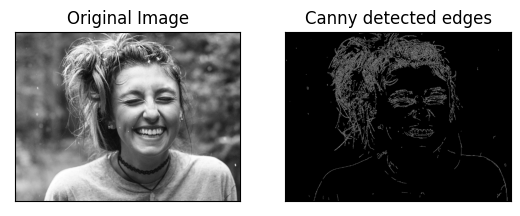

In [220]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
img = cv2.imread('images/RobinGray.jpg', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img,100,200,19)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny detected edges'), plt.xticks([]), plt.yticks([])
plt.show()


# Projecting point P from 3d to 2d
![pointProjection.jpg](images/pointProjection.jpg)


In [239]:
import numpy as np
#Given point P and focal lenght f
P=np.array([200,100,120,1])
f=50

#building projection matrix
matrix=np.zeros([3,4])
matrix[0,0]=1
matrix[1,1]=1
matrix[2,2]=1/f
#matrix*=f  # <--- this line scales projection matrix by f, results are the same
print("matrix\n", matrix)

#Calculating 2d point p, output in homogenous coordinates
p=matrix.dot(P)
print("p: ", p)

#Calculating position on image (u,v), transforming to cartesian
p_cartesian= np.array([p[0]/p[2], p[1]/p[2]  ] )
print("p_cartesian: ", p_cartesian)

matrix
 [[50.  0.  0.  0.]
 [ 0. 50.  0.  0.]
 [ 0.  0.  1.  0.]]
p:  [10000.  5000.   120.]
p_cartesian:  [83.33333333 41.66666667]


# Correspondence Problem
## Prepare two images
Image taken from here https://www.lockhaven.edu/~dsimanek/3d/stereo/3dgallery.htm

1. Read image
2. Convert to grayscale
3. Rescale between [-1, 1]
4. plot inline

5. Cut in half
6. Plot the result

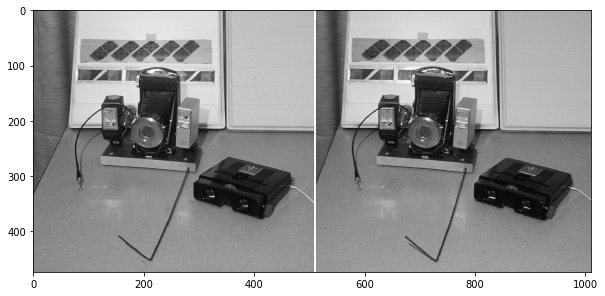

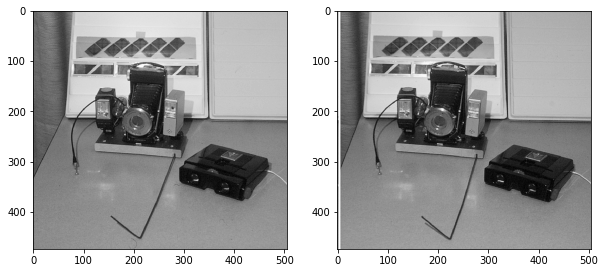

In [21]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('images/stereo_vision_camera.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

norm_image = cv2.normalize(gray, None, alpha=-1, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

plt.rcParams['figure.figsize'] = [10, 5]
plt.figure()
plt.imshow(gray,cmap='gray')


height, width = gray.shape
width_cutoff = width // 2

s1 = norm_image[:, :width_cutoff]
s2 = norm_image[:, width_cutoff+1:]




plt.figure()
plt.subplot(121)
plt.imshow(s1,cmap='gray')
plt.subplot(122)
plt.imshow(s2,cmap='gray')


# Correspondence Problem Get patch
Get patch from the first image

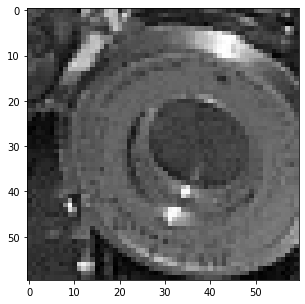

In [204]:
patch_x=170
patch_y=190
patch_size=60
patch = s1[patch_y:patch_y+patch_size, patch_x:patch_x+patch_size]
plt.figure()
plt.imshow(patch,cmap='gray')

# Correspondence Problem, Where to look for the patch in second image -> epipolar constraint
Now using epipolar constraind, and assuming colinear planes (images). We can just look for the patch in horizontal line with the same hegight as patch height (becasue we assume that camea between those two moved in this simplified way)


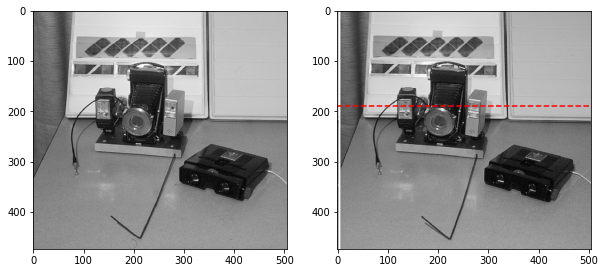

In [205]:
plt.subplot(121)
plt.imshow(s1,cmap='gray')
plt.subplot(122)
plt.imshow(s2,cmap='gray')
plt.axhline(y=patch_y, color='r', linestyle='--')


# Correspondence Problem, Find patch using SSd or Cross-correlation as a cost


In [206]:
import numpy as np
from scipy.signal import correlate2d

cost_Conv=[]
cost_SSD=[]
smallest_x=0
for x in range(s2.shape[0]-patch_size+1):
    second_patch = s2[patch_y:patch_y+patch_size, x:x+patch_size]
    cost_SSD.append(np.sum((patch[:,:]-second_patch[:,:])**2))
    cost_Conv.append(np.sum(np.multiply(second_patch,patch)))
cost_SSD.index(min(cost_SSD))

166

170

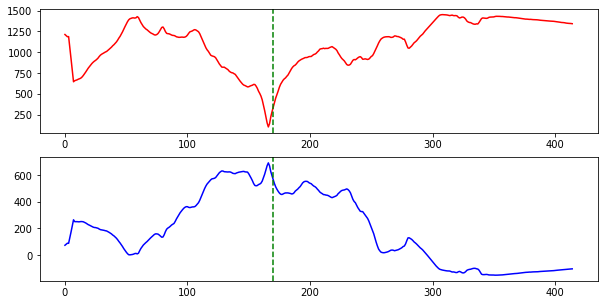

In [207]:
plt.subplot(211)
plt.plot(cost_SSD, 'r')
plt.axvline(x=patch_x, color='g', linestyle='--')
plt.subplot(212)
plt.plot(cost_Conv,'b')
plt.axvline(x=patch_x, color='g', linestyle='--')

patch_x

As it can be seen above, there is a difrence between position of the left image (green line on plots) and minimal cost index. Why, well because those images are not the same, they are taken from to diffren possitions, difrence between thise two points are called disparity